In [139]:
import tushare as ts
import plotly.express as px
import plotly.graph_objects as go
pro = ts.pro_api()

In [140]:
code_dict = {'603589':'口子窖',
            '000596':'古井贡酒',
            '603189':'迎驾贡酒',
            '600199':'金种子酒'}

# target_code = '603589.sh'
target_code = '000596.sz'

In [141]:
for k,v in list(code_dict.items()):
    if "." in k: continue
    surfix = '.SH' if k.startswith('6') else '.SZ'
    code_dict.pop(k)
    code_dict[k+surfix] = v
    
ts_codes = ','.join(code_dict.keys())

# 资产负债表

In [142]:
balancesheet = pro.balancesheet(ts_code=target_code)

## 取年报
balancesheet = balancesheet[balancesheet.end_date.apply(lambda x:x.endswith('1231') and x>'2010')]
balancesheet['end_date'] = balancesheet['end_date'].apply(lambda x:x[:4]+"-"+x[4:6]+"-"+x[6:])

## 去重
balancesheet['sumv'] = balancesheet.fillna(0).sum(axis=1)
balancesheet = balancesheet.groupby(['ts_code','end_date']).apply(lambda t:t[t.sumv==t.sumv.max()]).reset_index(drop=True).groupby(['ts_code','end_date']).head(1)
balancesheet.index = balancesheet['end_date']

## 资产负债表中的几个比率

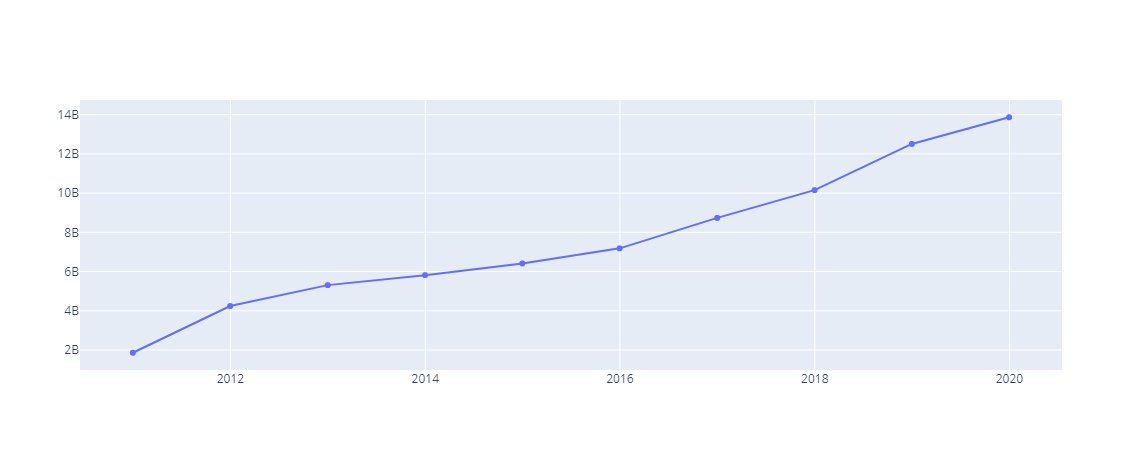

In [143]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=balancesheet.end_date, y=balancesheet.total_assets))
fig.show()

## 货币资金的比率

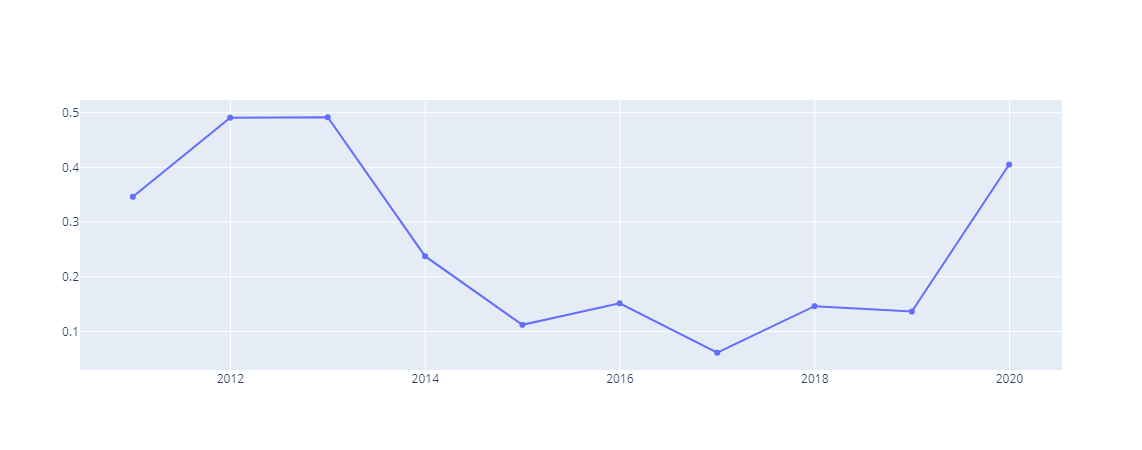

In [162]:
balancesheet['money_cap_ratio'] = balancesheet['money_cap']/balancesheet['total_assets']
fig = go.Figure()
fig.add_trace(go.Scatter(x=balancesheet.end_date, y=balancesheet.money_cap_ratio))
fig.show()

## 经营资产比率

In [145]:
cols_op = {"notes_receiv":"应收票据",
"accounts_receiv":"应收账款",
"oth_receiv":"其他应收款",
"prepayment":"预付款项",
"div_receiv":"应收股利",
"int_receiv":"应收利息",
"inventories":"存货",
"produc_bio_assets":"生产性生物资产"}

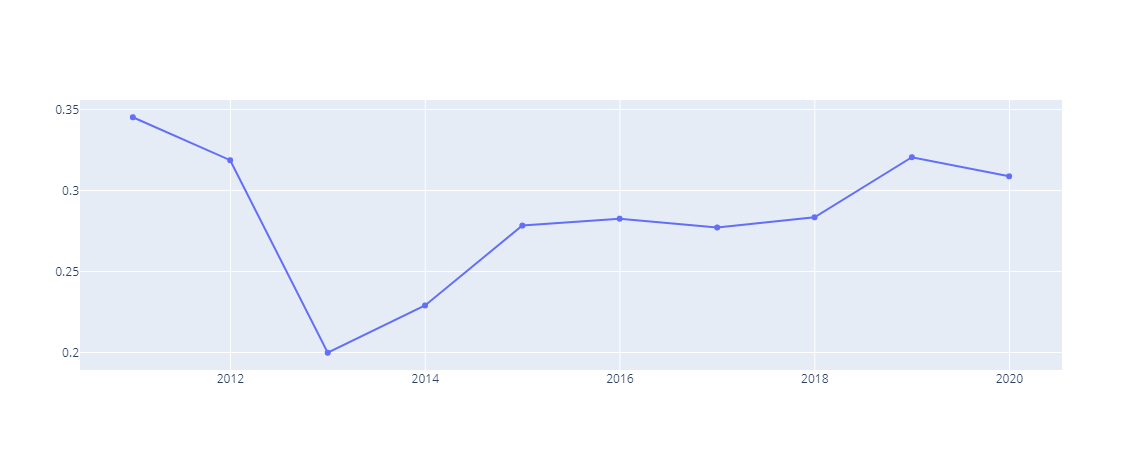

In [165]:
balancesheet['op_ratio'] = balancesheet[cols_op.keys()].sum(axis=1)/balancesheet['total_assets']
fig = go.Figure()
fig.add_trace(go.Scatter(x=balancesheet.end_date, y=balancesheet.op_ratio))
fig.show()

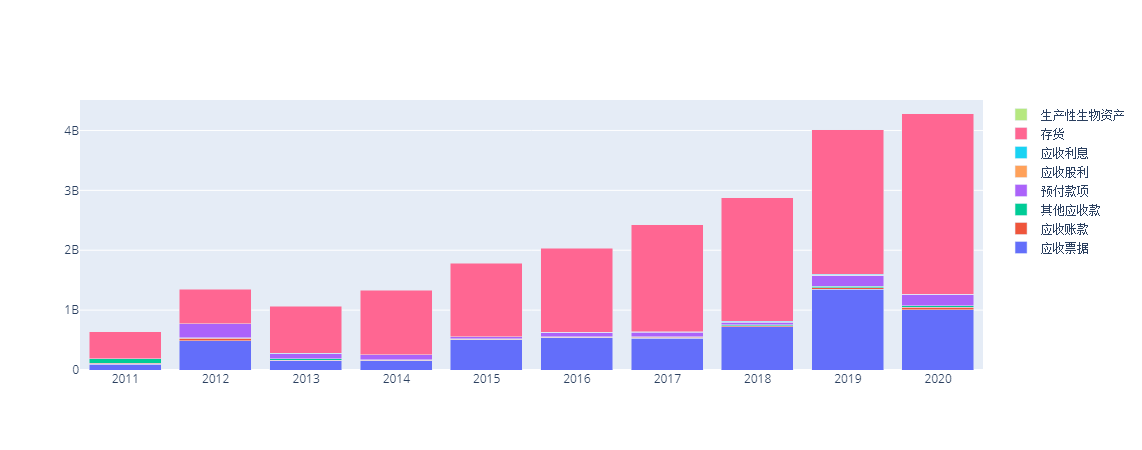

In [147]:
fig = go.Figure()
for col in cols_op:
    fig.add_trace(go.Bar(x=balancesheet.end_date, y=balancesheet[col], name=cols_op[col]))

# Change the bar mode
fig.update_layout(barmode='stack')
fig.show()

## 生产资产

In [148]:
cols_prod = {"fix_assets":"固定资产",
"cip":"在建工程",
"const_materials":"工程物资",
"intan_assets":"无形资产",
"goodwill":"商誉",
"lt_amor_exp":"长期待摊费用",
"defer_tax_assets":"递延所得税资产"}
# ？递延所得税资产 or 负债？

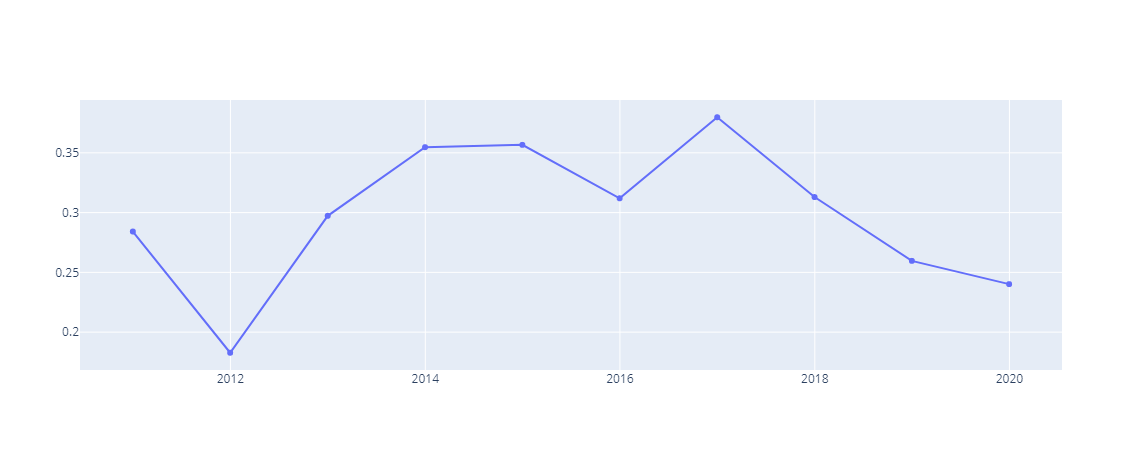

In [166]:
balancesheet['prod_ratio'] = balancesheet[cols_prod.keys()].sum(axis=1)/balancesheet['total_assets']
fig = go.Figure()
fig.add_trace(go.Scatter(x=balancesheet.end_date, y=balancesheet.prod_ratio))
fig.show()

## 非主营相关资产

In [150]:
cols_oth_ass = {
"trad_asset":"交易性金融资产",
"pur_resale_fa":"买入返售金融资产",
"oth_cur_assets":"其他流动资产",
"fa_avail_for_sale":"可供出售金融资产",
"htm_invest":"持有至到期投资",
"lt_eqt_invest":"长期股权投资",
"invest_real_estate":"投资性房地产"}

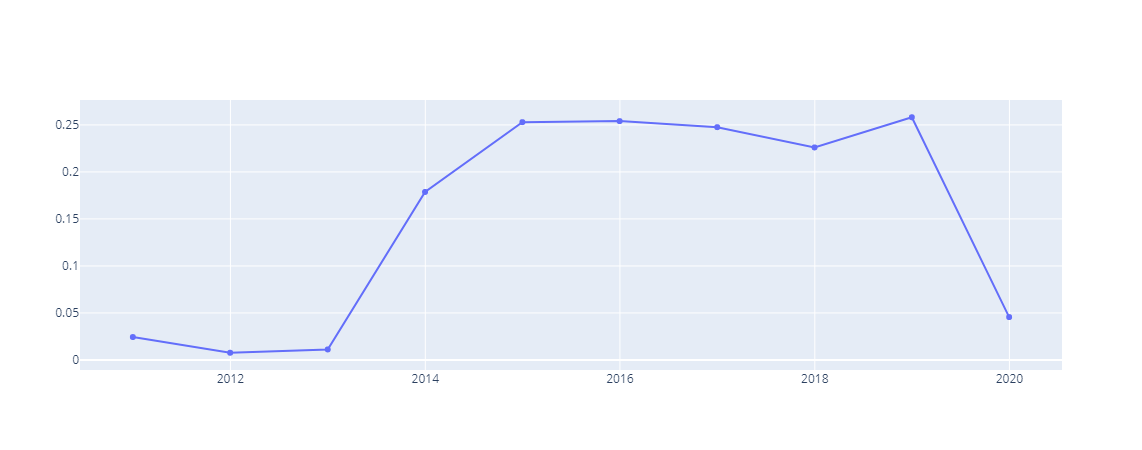

In [169]:
balancesheet['oth_ass_ratio'] = balancesheet[cols_oth_ass.keys()].sum(axis=1)/balancesheet['total_assets']
fig = go.Figure()
fig.add_trace(go.Scatter(x=balancesheet.end_date, y=balancesheet.oth_ass_ratio))
fig.show()

In [172]:
balancesheet = balancesheet.fillna(0)

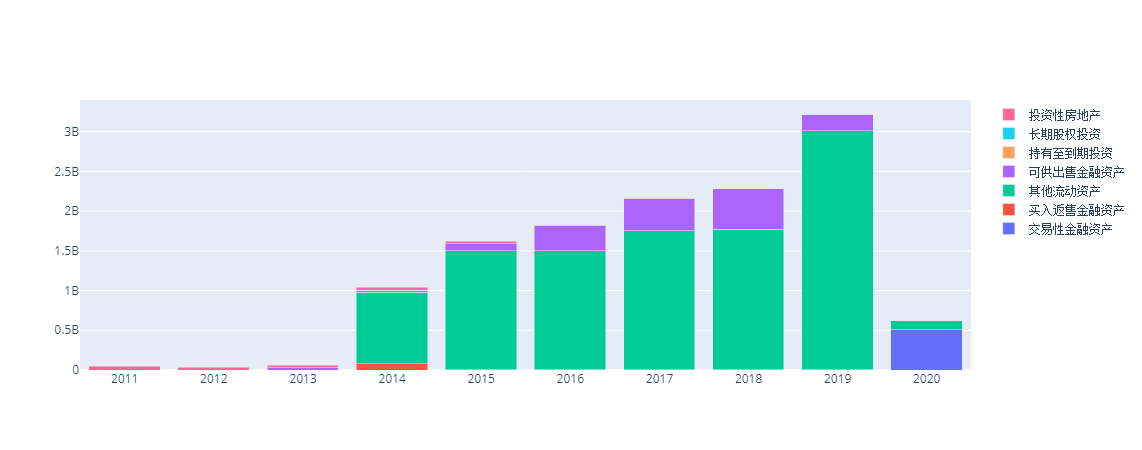

In [177]:
fig = go.Figure()
for col in cols_oth_ass:
    fig.add_trace(go.Bar(x=balancesheet.end_date, y=balancesheet[col], name=cols_oth_ass[col]))

# Change the bar mode
fig.update_layout(barmode='stack')
fig.show()

In [153]:
83/2265

0.03664459161147903

In [154]:
## 2019理财收益
35/2335
## ？？大股东占用资金？

0.014989293361884369

In [155]:
# 除商誉外的资产负债率
# 安全性

# 利润表

In [156]:
def process_unique(df):
    df['sumv'] = df.fillna(0).sum(axis=1)
    df = df.groupby(['ts_code','end_date']).apply(lambda t:t[t.sumv==t.sumv.max()]).reset_index(drop=True).groupby(['ts_code','end_date']).head(1)
    df.index = df['end_date']
    return df

In [157]:
income = pro.income(ts_code=target_code)

In [158]:
income = process_unique(income)

In [159]:
income = income[income.end_date.apply(lambda x:x.endswith('1231') and x>'2010')]

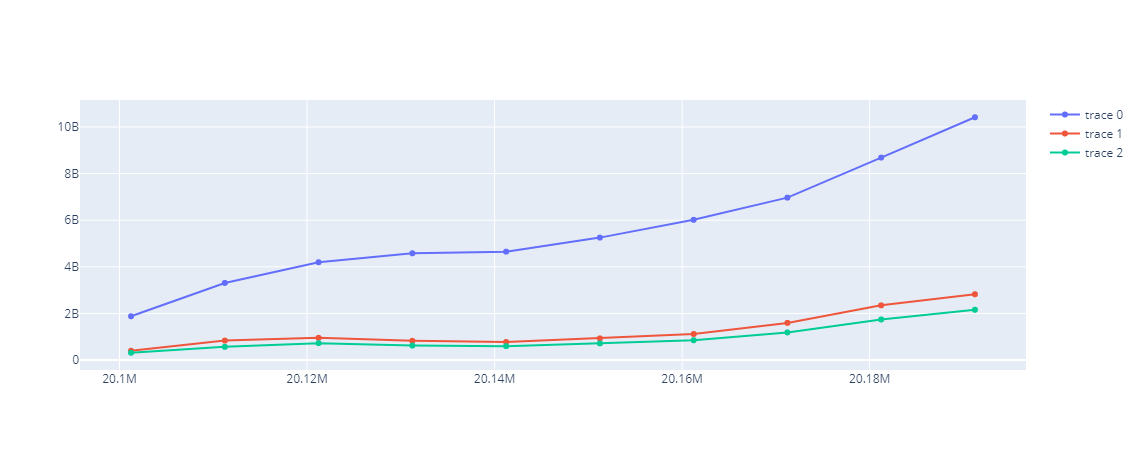

In [160]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=income.end_date, y=income.total_revenue))
fig.add_trace(go.Scatter(x=income.end_date, y=income.operate_profit))
fig.add_trace(go.Scatter(x=income.end_date, y=income.n_income))
fig.show()
# px.line(income,x='end_date',y=['total_revenue','operate_profit','n_income'])

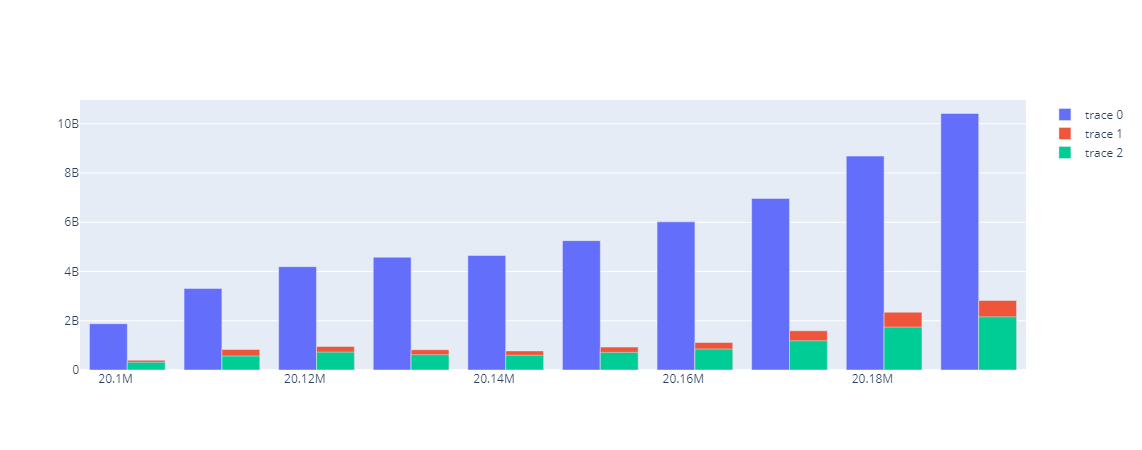

In [161]:
## 使用bar，对比分组数据
fig = go.Figure()
fig.add_trace(go.Bar(x=income.end_date, y=income.total_revenue, offsetgroup=0))
fig.add_trace(go.Bar(x=income.end_date, y=income.operate_profit, offsetgroup=1))
fig.add_trace(go.Bar(x=income.end_date, y=income.n_income, offsetgroup=1))
fig.show()
# px.line(income,x='end_date',y=['total_revenue','operate_profit','n_income'])